# LSA – Latent Semantic Analysis

## First Example

In [1]:
body = [
    "the quick brown fox",
    "the slow brown dog",
    "the quick red dog",
    "the lazy yellow fox"
]

## Document Term Matrix

- `min_df` signifies the number of documents in which a term must appear in order for it to be counted
- `stop_words`

**Note:** `CountVectorizer` returns sparce matrix

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(body)

This process has converter each **document** into a vector. The matrix consists of a vector for each "document" in the **body**.

        "the quick brown fox" = (1, 0, 1, 0, 1, 0, 0, 1, 0)
        "the slow brown dog" = (1, 1, 0, 0, 0, 0, 1, 1, 0)
        "the quick red dog" = (0, 1, 0, 0 1, 1, 0, 1, 0)
        "the lazy yellow fox" = (0, 0, 1, 1, 0, 0, 0, 1, 1)

In [3]:
bag_of_words.todense()  # returns a matrix

matrix([[1, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 1]])

In [4]:
bag_of_words.toarray()  # returns a ndarray

array([[1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1]])

## Singular Value Decomposition

This can be achieved using the `TruncatedSVD` model. 

The function is named "truncated" SVD because it is capable of returning a dataset with fewer features than it is passed without significant loss of information, that is great for reducing the dimension of data.

In [5]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

## Topic-encoded Data

The process transforms the original  data into **topic-encoded data**.
Here, each row in indexed by its original text value . The data now consists of two columns of data one representing each of the two topics used to encode the **body**. Recall that this value of 2 was passed as an argument to the `TruncatedSVD` in the previous step.

In [6]:
import pandas as pd

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["body"] = body
display(topic_encoded_df[["body", "topic_1", "topic_2"]])

,body,topic_1,topic_2
0,the quick brown fox,1.390710,0.461503
1,the slow brown dog,1.188553,-0.669921
2,the quick red dog,1.188553,-0.669921
3,the lazy yellow fox,0.640855,1.483420


We can see 4 original documents and a numerical value according to each of the 2 topics. All 4 documents are strong in topic 1 but there is a clear distinction for topic 2 between the 2nd and 3rd document and the 1st and 4th. Looking at this, we can intuitively tell that the 1st and 4th documents are about foxes whereas the 2nd and 3rd are about dogs. 

## Byproducts of the Latent Semantic Analysis

The LSA generates a few byproducts that are useful for analysis:
    
- The **dictionary** or the set of all words that appear at leat once in the **body**.
- The **encoding matix** used to encode the documents into topics. The **encoding matrix** can be studied to gain an understanding of the **topics** that are latent to the **body**.

### Dictionary

The dictionary is an attribute of a fit `CountVectorizer` model and can be accessed using the `.get_feature_names`method.

In [7]:
dictionary = vectorizer.get_feature_names()
dictionary[:10]

['brown', 'dog', 'fox', 'lazy', 'quick', 'red', 'slow', 'yellow']

### The Encoding Matrix

The **encoding matrix**  is comprised of the `components_`stored as an attribute of a fit `TruncatedSVD`. We can examine this matrix to gain an understanding of the **topics** latent to the **body**.

**Note:** in `sklearn`, attributes of a model that are generated by a fitting process have.a trailing underscore in their name as can be seen here with `svd.components_`.

In [8]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2']).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

,topic_1,topic_2,terms
0,0.498882,-0.062945,brown
1,0.459781,-0.404651,dog
2,0.392946,0.587393,fox
3,0.123954,0.448013,lazy
4,0.498882,-0.062945,quick
5,0.229890,-0.202325,red
6,0.229890,-0.202325,slow
7,0.123954,0.448013,yellow


Each row represents a word in our dictionary and each columns one of our two topics. The numerical values can be thought of as an expression of that word in a given topic.

### Interpret The Encoding Matrix

What are the top words for each topic? What dimensions in word-space explain most of the variance in the data?

to analyze this, we will need to look at the *absolute value* of the expression of each word in the topic.

In [9]:
import numpy as np

encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abs_topic_1', ascending=False)

,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
0,0.498882,-0.062945,brown,0.498882,0.062945
4,0.498882,-0.062945,quick,0.498882,0.062945
1,0.459781,-0.404651,dog,0.459781,0.404651
2,0.392946,0.587393,fox,0.392946,0.587393
6,0.229890,-0.202325,slow,0.229890,0.202325
5,0.229890,-0.202325,red,0.229890,0.202325
3,0.123954,0.448013,lazy,0.123954,0.448013
7,0.123954,0.448013,yellow,0.123954,0.448013


In [10]:
encoding_matrix.sort_values('abs_topic_2', ascending=False)

,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
2,0.392946,0.587393,fox,0.392946,0.587393
3,0.123954,0.448013,lazy,0.123954,0.448013
7,0.123954,0.448013,yellow,0.123954,0.448013
1,0.459781,-0.404651,dog,0.459781,0.404651
6,0.229890,-0.202325,slow,0.229890,0.202325
5,0.229890,-0.202325,red,0.229890,0.202325
0,0.498882,-0.062945,brown,0.498882,0.062945
4,0.498882,-0.062945,quick,0.498882,0.062945


# Second Example

In [11]:
import pandas as pd

body_df = pd.read_csv('two_poems.csv')
body_df.columns = ['sentence', 'title']
sample_df = body_df.sample(5)
sample_indices = sample_df.index
display(sample_df)

,sentence,title
5,And a little toy house,"Goodnight, Moon"
28,Goodnight air,"Goodnight, Moon"
8,And a quiet old lady who was whispering “hush”,"Goodnight, Moon"
0,And a picture of-,"Goodnight, Moon"
20,Goodnight little house,"Goodnight, Moon"


In [12]:
vectorizer = CountVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(body_df.sentence)

In [13]:
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

In [14]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["sentence"] = body_df.sentence
topic_encoded_df['Is_Wild_things'] = (body_df.title == "Where the Wild Things Are")
display(topic_encoded_df.iloc[sample_indices])

,topic_1,topic_2,sentence,Is_Wild_things
5,1.472335e-01,9.625985e-02,And a little toy house,False
28,9.977794e-01,-1.996169e-02,Goodnight air,False
8,3.204734e-01,-1.024753e-02,And a quiet old lady who was whispering “hush”,False
0,4.017269e-09,2.562349e-07,And a picture of-,False
20,1.089566e+00,7.167405e-02,Goodnight little house,False


In [15]:
dictionary = vectorizer.get_feature_names()
dictionary[:10]

['air',
 'appointed',
 'attaché',
 'balloon',
 'bears',
 'bed',
 'begged',
 'belarus',
 'belted',
 'beltway']

In [16]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2']).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

,topic_1,topic_2,terms
0,0.048306,-0.001245,air
1,-0.000007,-0.000019,appointed
2,0.000822,0.080134,attaché
3,0.000001,-0.000011,balloon
4,0.058589,-0.000170,bears
...,...,...,...
118,-0.000014,0.000003,wound
119,0.000759,0.073452,year
120,0.000004,-0.000044,years
121,0.000726,0.073882,yes


In [17]:
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abs_topic_1', ascending=False)

,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
37,9.494736e-01,-1.871654e-02,goodnight,9.494736e-01,1.871654e-02
61,1.238003e-01,-3.403382e-03,moon,1.238003e-01,3.403382e-03
52,7.624033e-02,-2.402477e-03,lady,7.624033e-02,2.402477e-03
114,7.624033e-02,-2.402477e-03,whispering,7.624033e-02,2.402477e-03
69,7.624033e-02,-2.402477e-03,old,7.624033e-02,2.402477e-03
...,...,...,...,...,...
85,3.544617e-07,4.394611e-05,rolled,3.544617e-07,4.394611e-05
103,3.544617e-07,4.394611e-05,terrible,3.544617e-07,4.394611e-05
83,3.544617e-07,4.394611e-05,roar,3.544617e-07,4.394611e-05
115,-2.065924e-07,1.023697e-04,wild,2.065924e-07,1.023697e-04


In [18]:
encoding_matrix.sort_values('abs_topic_2', ascending=False)

,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
57,1.292637e-02,8.873927e-01,max,1.292637e-02,8.873927e-01
117,1.663917e-03,1.640102e-01,wore,1.663917e-03,1.640102e-01
110,1.318702e-03,1.174247e-01,use,1.318702e-03,1.174247e-01
116,9.890415e-04,1.053008e-01,wolf,9.890415e-04,1.053008e-01
102,9.890415e-04,1.053008e-01,suit,9.890415e-04,1.053008e-01
...,...,...,...,...,...
22,2.089557e-06,-2.250589e-06,condo,2.089557e-06,2.250589e-06
106,1.636543e-05,1.976668e-06,things,1.636543e-05,1.976668e-06
68,8.155343e-06,1.089526e-06,oh,8.155343e-06,1.089526e-06
82,8.210089e-06,8.871427e-07,roam,8.210089e-06,8.871427e-07


# Plot Topic Encoded Data

False
True


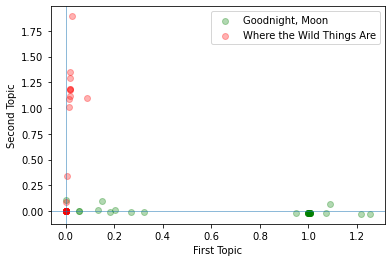

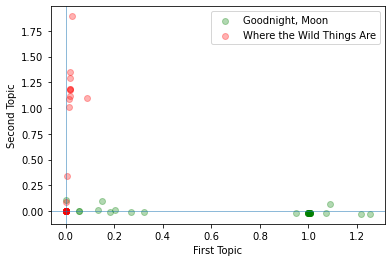

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for val in topic_encoded_df.Is_Wild_things.unique():
    topic_1 = topic_encoded_df[topic_encoded_df.Is_Wild_things == val]['topic_1'].values
    topic_2 = topic_encoded_df[topic_encoded_df.Is_Wild_things == val]['topic_2'].values
    print(val)
    color = "red" if val else "green"
    label = "Where the Wild Things Are" if val else "Goodnight, Moon"
    ax.scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)
    
ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

display(fig)

# Revising the LSA with a TF-IDF Document Term Matrix

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(body_df.sentence)

In [21]:
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

In [22]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["sentence"] = body_df.sentence
topic_encoded_df['Is_Wild_things'] = (body_df.title == "Where the Wild Things Are")
display(topic_encoded_df.iloc[sample_indices])

,topic_1,topic_2,sentence,Is_Wild_things
5,1.009971e-01,0.388935,And a little toy house,False
28,4.619548e-01,-0.026283,Goodnight air,False
8,5.996807e-02,-0.011748,And a quiet old lady who was whispering “hush”,False
0,-7.762426e-07,-0.004650,And a picture of-,False
20,4.575954e-01,0.373858,Goodnight little house,False


In [23]:
dictionary = vectorizer.get_feature_names()
dictionary[:10]

['air',
 'appointed',
 'attaché',
 'balloon',
 'bears',
 'bed',
 'begged',
 'belarus',
 'belted',
 'beltway']

In [24]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2']).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

,topic_1,topic_2,terms
0,0.081288,-0.008510,air
1,0.000103,0.001836,appointed
2,0.000151,0.081153,attaché
3,-0.000100,-0.001511,balloon
4,0.103585,0.045790,bears
...,...,...,...
118,0.000005,-0.000923,wound
119,0.000135,0.065931,year
120,-0.000030,-0.000748,years
121,0.000088,0.067243,yes


In [25]:
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abs_topic_1', ascending=False)

,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
37,9.058068e-01,-0.043354,goodnight,9.058068e-01,0.043354
61,1.604157e-01,-0.098678,moon,1.604157e-01,0.098678
51,1.112879e-01,0.116028,kittens,1.112879e-01,0.116028
17,1.035924e-01,0.047892,chairs,1.035924e-01,0.047892
4,1.035854e-01,0.045790,bears,1.035854e-01,0.045790
...,...,...,...,...,...
14,-4.851004e-06,-0.000573,bred,4.851004e-06,0.000573
112,4.838644e-06,-0.000923,warehouse,4.838644e-06,0.000923
27,4.838644e-06,-0.000923,dead,4.838644e-06,0.000923
118,4.838644e-06,-0.000923,wound,4.838644e-06,0.000923


In [26]:
encoding_matrix.sort_values('abs_topic_2', ascending=False)

,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
57,0.004316,0.693443,max,0.004316,0.693443
43,0.074976,0.302449,house,0.074976,0.302449
56,0.098998,0.294426,little,0.098998,0.294426
110,0.000460,0.169265,use,0.000460,0.169265
117,0.000298,0.166790,wore,0.000298,0.166790
...,...,...,...,...,...
28,0.000016,-0.000165,department,0.000016,0.000165
10,0.000019,-0.000038,book,0.000019,0.000038
20,0.000019,-0.000038,college,0.000019,0.000038
90,0.000019,-0.000038,sales,0.000019,0.000038


False
True


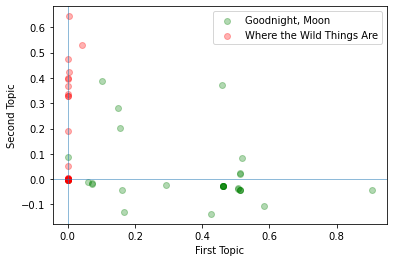

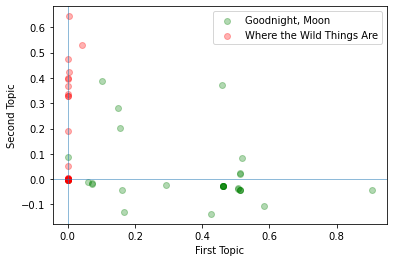

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for val in topic_encoded_df.Is_Wild_things.unique():
    topic_1 = topic_encoded_df[topic_encoded_df.Is_Wild_things == val]['topic_1'].values
    topic_2 = topic_encoded_df[topic_encoded_df.Is_Wild_things == val]['topic_2'].values
    print(val)
    color = "red" if val else "green"
    label = "Where the Wild Things Are" if val else "Goodnight, Moon"
    ax.scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)
    
ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

display(fig)